In [1]:
import numpy as np
import matplotlib.pyplot as plt

%load_ext lab_black
%matplotlib inline

In [2]:
x = np.linspace(1, 10, 19)
y = x
np.corrcoef(x, y)

array([[1., 1.],
       [1., 1.]])

The return value of corrcoef(x, y)

![Alt text](https://miro.medium.com/v2/resize%3Afit%3A690/format%3Awebp/1%2ArVeG7heQkB1KO2jr46quhQ%402x.png)

In [3]:
x = np.linspace(1, 10, 19)
y = np.linspace(1, 10, 19) + np.random.normal(0, 2, 19)
np.corrcoef(x, y)

array([[1.        , 0.81934826],
       [0.81934826, 1.        ]])

# Multivariate normal distribution (MVN). 
µ and Σ are the parameters of the MVN distribution. We can generate some possible values of X using NumPy’s function random.multivariate_normal().

(150, 2) [-2.34469817 -1.54438375]
(150,) -2.344698169818897
(150,) -1.5443837530844489


Text(0, 0.5, '$x_2$')

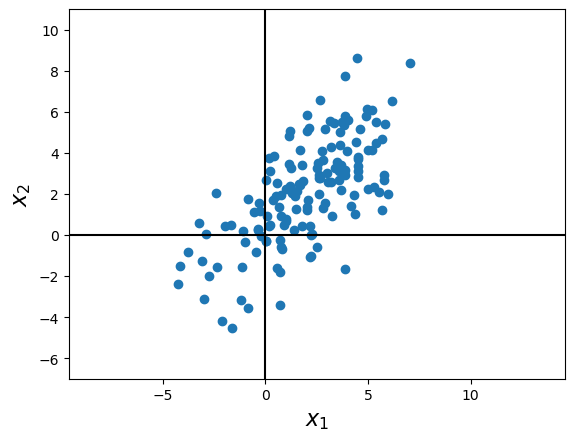

In [4]:
np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4], [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
print(points.shape, points[0])
x1, x2 = points.T
print(x1.shape, x1[0])
print(x2.shape, x2[0])
plt.scatter(x1, x2)
# plt.scatter(points[:, 0], points[:, 1])
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
plt.axis("equal")
plt.xlim([-5, 10])
plt.ylim([-7, 11])
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$x_2$", fontsize=16)

In [5]:
# Listing 6
u1 = np.array([[1 / np.sqrt(2)], [1 / np.sqrt(2)]])
u2 = np.array([[-1 / np.sqrt(2)], [1 / np.sqrt(2)]])
projected_points1 = np.dot(points, u1).T
var_X_u1 = np.var(projected_points1[0])  # compute variance of projected points
projected_points2 = np.dot(points, u2).T
var_X_u2 = np.var(projected_points2[0])
print("Variance of X along u1", round(var_X_u1, 3))
print("Variance of X along u2", round(var_X_u2, 3))

Variance of X along u1 10.169
Variance of X along u2 1.958


Text(1.2, -1.5, '$\\{\\mathregular{Su}\\}$')

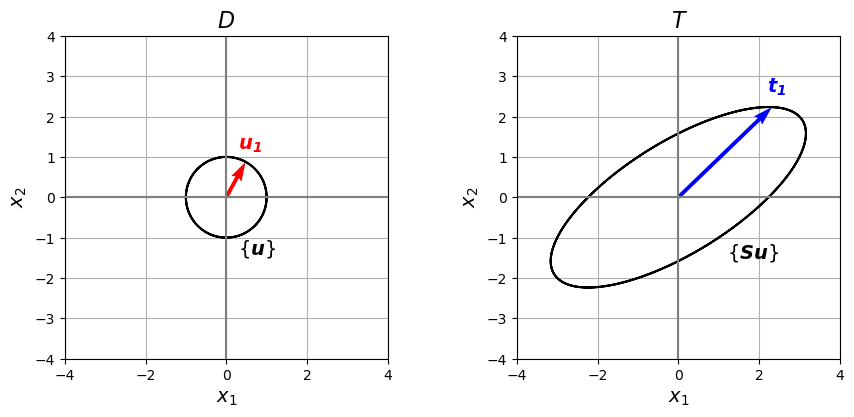

In [6]:
theta = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)

d = np.vstack((xi, yi))

# getting a sample vector from d
d_sample1 = d[:, 85]

S = np.array([[3, 1], [1, 2]])

t = S @ d  # Vectors in t are the transformed vectors of d

t_sample1 = t[:, 85]

origin = [0], [0]  # origin point
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 15))

plt.subplots_adjust(wspace=0.4)

# Plotting D
ax1.plot(d[0, :], d[1, :], color="black")
ax1.quiver(
    *origin,
    d_sample1[0],
    d_sample1[1],
    color=["r"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.set_xlabel("$x_1$", fontsize=14)
ax1.set_ylabel("$x_2$", fontsize=14)
ax1.set_xlim([-4, 4])
ax1.set_ylim([-4, 4])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("D", style="italic", fontsize=16)
ax1.axhline(y=0, color="grey")
ax1.axvline(x=0, color="grey")
ax1.text(
    0.3,
    1.2,
    "$\mathregular{u_1}$",
    color="r",
    fontsize=14,
    weight="bold",
    style="italic",
)
ax1.text(
    0.3,
    -1.4,
    "$\{\mathregular{u}\}$",
    color="black",
    fontsize=14,
    weight="bold",
    style="italic",
)

# Plotting T
ax2.plot(t[0, :], t[1, :], color="black")
ax2.quiver(
    *origin,
    t_sample1[0],
    t_sample1[1],
    color=["b"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)

ax2.set_xlabel("$x_1$", fontsize=14)
ax2.set_ylabel("$x_2$", fontsize=14)
ax2.set_xlim([-4, 4])
ax2.set_ylim([-4, 4])
ax2.set_aspect("equal")
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("T", style="italic", fontsize=16)
ax2.axhline(y=0, color="grey")
ax2.axvline(x=0, color="grey")
ax2.text(
    2.2,
    2.6,
    "$\mathregular{t_1}$",
    color="b",
    fontsize=14,
    weight="bold",
    style="italic",
)
ax2.text(
    1.2,
    -1.5,
    "$\{\mathregular{Su}\}$",
    color="black",
    fontsize=14,
    weight="bold",
    style="italic",
)

([0], [0])

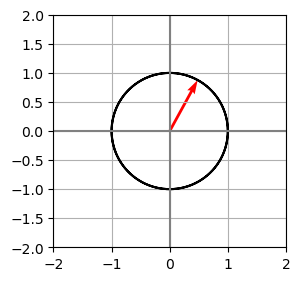

In [7]:
theta = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
xi = np.cos(theta)
yi = np.sin(theta)
d = np.vstack((xi, yi))
origin = [0], [0]  # origin point
fig, ax1 = plt.subplots(1, 1, figsize=(3, 4))
ax1.plot(d[0, :], d[1, :], color="black")
ax1.quiver(
    *origin,
    d_sample1[0],
    d_sample1[1],
    color=["r"],
    width=0.012,
    angles="xy",
    scale_units="xy",
    scale=1
)
ax1.set_xlim([-2, 2])
ax1.set_ylim([-2, 2])
ax1.set_aspect("equal")
ax1.grid(True)
ax1.axhline(y=0, color="grey")
ax1.axvline(x=0, color="grey")
origin

In [8]:
from sklearn.decomposition import PCA

np.random.seed(0)
mu = [2, 2]
Sigma = [[6, 4], [4, 6]]
points = np.random.multivariate_normal(mu, Sigma, 150)
pca = PCA(n_components=2)
pca.fit(points)

PCA(n_components=2)

In [9]:
pca.explained_variance_

array([10.24723443,  1.96099192])

In [10]:
from sklearn.datasets import fetch_openml

Xtil, y = fetch_openml("mnist_784", version=1, return_X_y=True)
print(Xtil.shape)
print(y.shape)

(70000, 784)
(70000,)


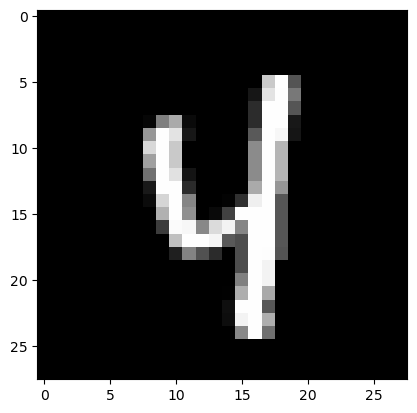

In [57]:
Xhat = Xtil.to_numpy()  # Xtil is a pandas dataframe
plt.imshow(Xhat[1006].reshape(28, 28), cmap="gray")
plt.show()

In [12]:
y[0], type(y)

('5', pandas.core.series.Series)

In [13]:
Xhat = Xhat / 255.0
pca = PCA().fit(Xhat)
# we will have 784 eigenvectors or principal components. 
# We can check the eigenvalues to see if any of them is zero.
len(pca.explained_variance_[pca.explained_variance_ <= 1e-15])

71

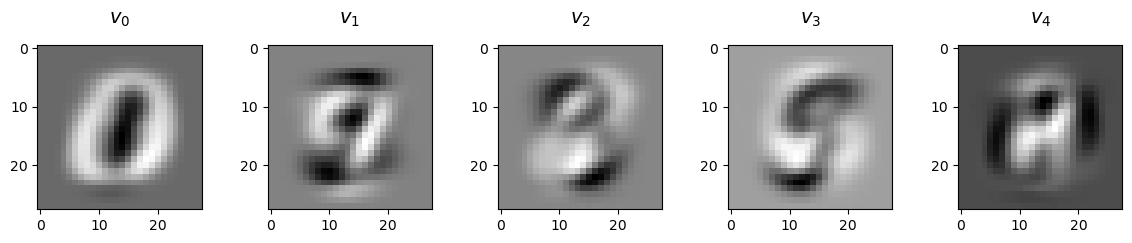

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(14, 8))
plt.subplots_adjust(wspace=0.4)

for i in range(5):
    axes[i].imshow(pca.components_[i, :].reshape(28, 28), cmap="gray")
    axes[i].set_title(r"$v_" + str(i) + "$", y=1.08, fontsize=14)

In [86]:
coordinates = pca.transform(Xhat)
Xhat.shape

(70000, 784)

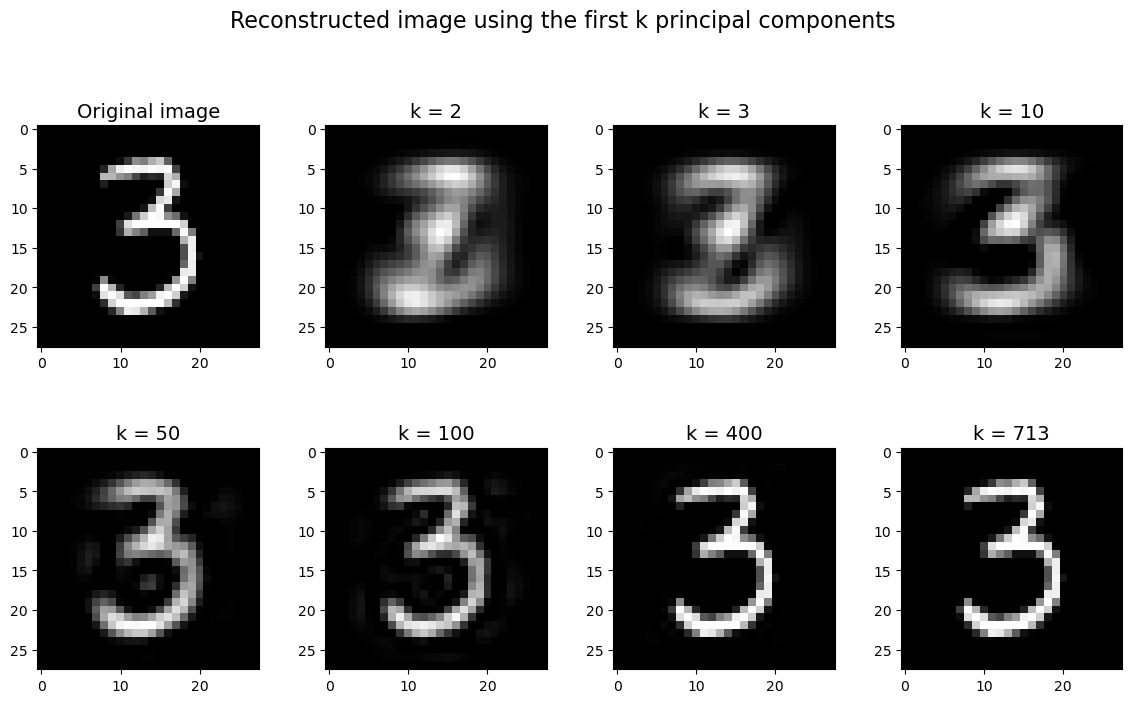

In [68]:
num_eigv = [2, 3, 10, 50, 100, 400, 713]
num_cols = 4

fig, axes = plt.subplots(2, num_cols, figsize=(14, 8))
fig.suptitle("Reconstructed image using the first k principal components", fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.1)

axes[0, 0].imshow(Xhat[50, :].reshape(28, 28), cmap="gray")
axes[0, 0].set_title("Original image", fontsize=14)

for i in range(1, 8):
    rec_vec = (
        np.sum(
            coordinates[50, : num_eigv[i - 1]].reshape(-1, 1)
            * pca.components_[: num_eigv[i - 1], :],
            axis=0,
        )
        + pca.mean_
    )
    rec_vec[rec_vec < 0] = 0
    axes[i // num_cols, i % num_cols].imshow(rec_vec.reshape(28, 28), cmap="gray")
    axes[i // num_cols, i % num_cols].set_title(
        "k = {}".format(num_eigv[i - 1]), fontsize=14
    )

In [30]:
pca.explained_variance_.shape, pca.explained_variance_ratio_.shape

((784,), (784,))

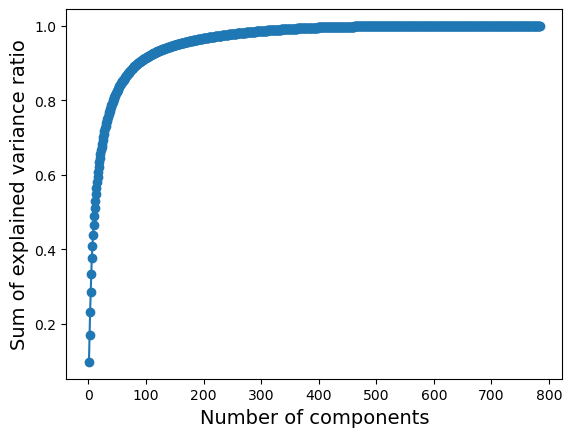

In [33]:
# Listing 23
plt.plot(range(1, 785), np.cumsum(pca.explained_variance_ratio_), marker="o")
plt.xlabel("Number of components", fontsize=14)
plt.ylabel("Sum of explained variance ratio", fontsize=14)
plt.show()

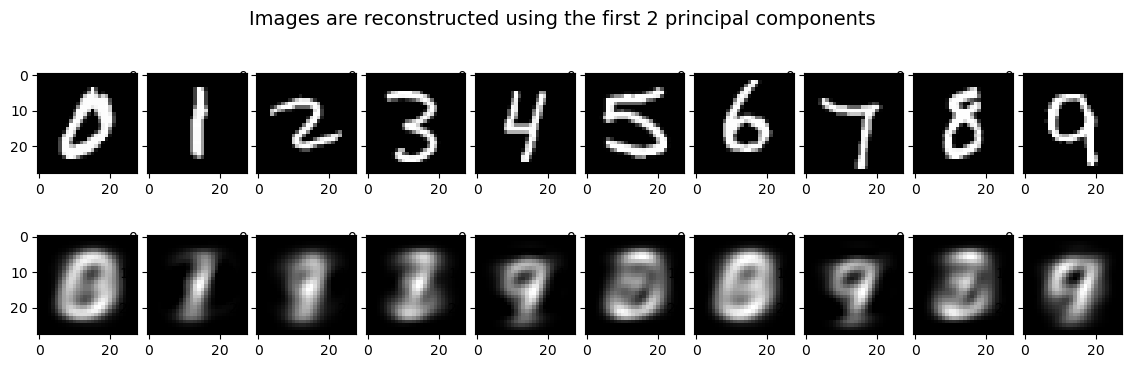

In [65]:
indices = np.argsort(y)
num_cols = 10

fig, axes = plt.subplots(2, 10, figsize=(14, 4))
fig.suptitle(
    "Images are reconstructed using the first 2 principal components", fontsize=14
)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for i in range(num_cols):
    axes[0, i].imshow(Xhat[indices[i * 7500], :].reshape(28, 28), cmap="gray")
    rec_vec = (
        np.sum(
            coordinates[indices[i * 7500], :2].reshape(-1, 1) * pca.components_[:2, :],
            axis=0,
        )
        + pca.mean_
    )
    rec_vec[rec_vec < 0] = 0
    axes[1, i].imshow(rec_vec.reshape(28, 28), cmap="gray")

In [67]:
np.bincount(y.astype("int"))

(array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]),
 pandas.core.series.Series)

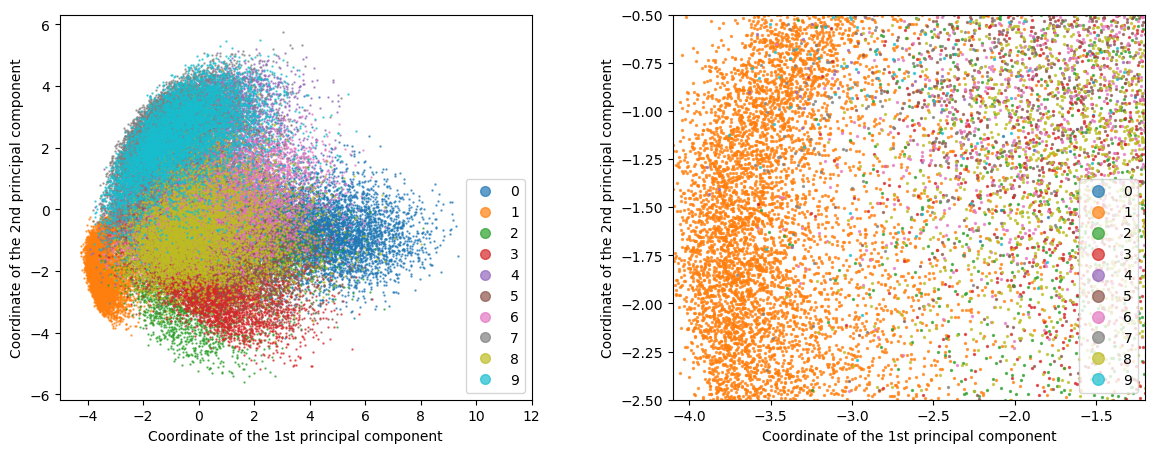

In [70]:
import pandas as pd

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
plt.subplots_adjust(wspace=0.3)

data_points = pd.DataFrame(
    {"X Value": coordinates[:, 0], "Y Value": coordinates[:, 1], "Category": y}
)

groups = data_points.groupby("Category")
for name, group in groups:
    ax1.plot(
        group["X Value"],
        group["Y Value"],
        marker="o",
        linestyle="",
        label=name,
        alpha=0.7,
        markersize=0.7,
    )

ax1.set_xlim([-5, 12])
ax1.set_xlabel("Coordinate of the 1st principal component")
ax1.set_ylabel("Coordinate of the 2nd principal component")
ax1.legend(loc="lower right", markerscale=10)

groups = data_points.groupby("Category")
for name, group in groups:
    ax2.plot(
        group["X Value"],
        group["Y Value"],
        marker="o",
        linestyle="",
        label=name,
        alpha=0.7,
        markersize=1.4,
    )

ax2.set_xlim([-4.1, -1.2])
ax2.set_ylim([-2.5, -0.5])
ax2.set_xlabel("Coordinate of the 1st principal component")
ax2.set_ylabel("Coordinate of the 2nd principal component")
ax2.legend(loc="lower right", markerscale=6)

(784,)


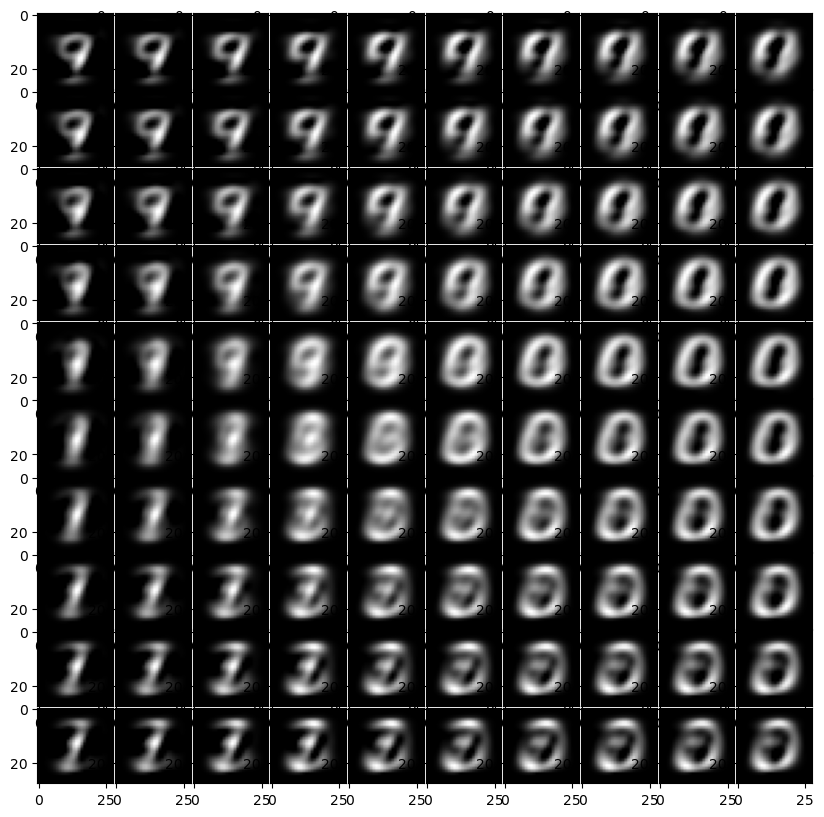

In [73]:
num_cols = 10
fig, axes = plt.subplots(num_cols, num_cols, figsize=(10, 10))
plt.subplots_adjust(wspace=0.02, hspace=0.02)

for (num_i, i) in enumerate(np.linspace(-4, 8, num_cols)):
    for (num_j, j) in enumerate(np.linspace(-5, 5, num_cols)):
        rec_vec = i * pca.components_[0, :] + j * pca.components_[1, :] + pca.mean_
        rec_vec[rec_vec < 0] = 0
        axes[(num_cols - 1) - num_j, num_i].imshow(rec_vec.reshape(28, 28), cmap="gray")

Text(0.5, 1.05, 'Reconstructed image using the \nfirst 50 principal components')

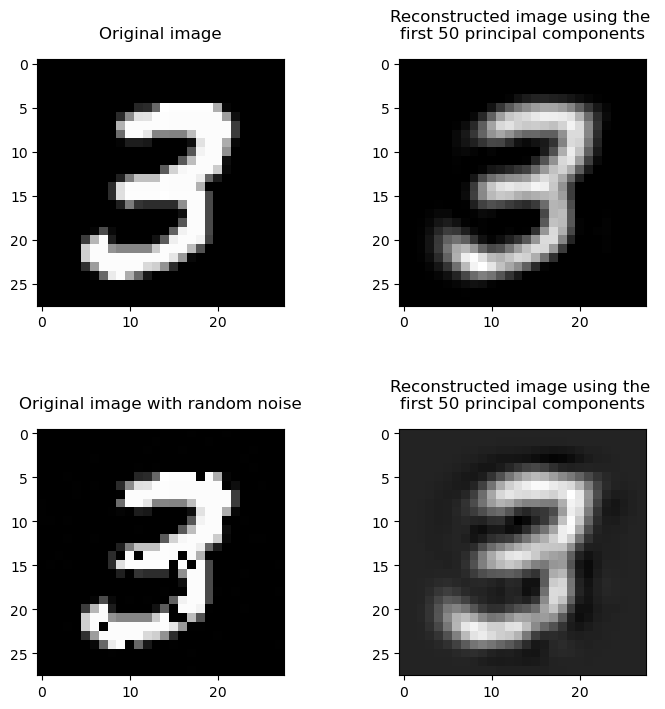

In [87]:
np.random.seed(250)
num_eigv = 50
index = 7
sample_img = Xhat[index, :].copy()
# Adding noise
noise = np.random.rand(sample_img.shape[0])
sample_img[noise > 0.9] = 1

rec_vec = (
    np.sum(
        coordinates[index, :num_eigv].reshape(-1, 1) * pca.components_[:num_eigv, :],
        axis=0,
    )
    + pca.mean_
)
rec_vec[rec_vec < 0] = 0

new_coordinates = pca.transform(sample_img.reshape(1, -1))

rec_noisy_vec = (
    np.sum(
        new_coordinates[0, :num_eigv].reshape(-1, 1) * pca.components_[:num_eigv, :],
        axis=0,
    )
    + pca.mean_
)
rec_noisy_vec[rec_vec < 0] = 0

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

axes[0, 0].imshow(Xhat[index, :].reshape(28, 28), cmap="gray")
axes[0, 0].set_title("Original image", y=1.05)

axes[0, 1].imshow(rec_vec.reshape(28, 28), cmap="gray")
axes[0, 1].set_title(
    "Reconstructed image using the \nfirst {} principal components".format(num_eigv),
    y=1.05,
)

axes[1, 0].imshow(sample_img.reshape(28, 28), cmap="gray")
axes[1, 0].set_title("Original image with random noise", y=1.05)

axes[1, 1].imshow(rec_noisy_vec.reshape(28, 28), cmap="gray")
axes[1, 1].set_title(
    "Reconstructed image using the \nfirst {} principal components".format(num_eigv),
    y=1.05,
)